In [1]:
import pandas as analytics
import numpy as maths
import matplotlib.pyplot as graph
from math import exp , pi
# from numpy.linalg import inv, det
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_raw = analytics.read_csv('../data/Data1.csv')
df_raw = df_raw.drop('Unnamed: 0',axis=1)
df_raw = df_raw.rename(columns = {"0":'x',"1":'y'})
df_raw

,x,y
0,1.004939,2.319887
1,3.412653,-1.637157
2,7.483318,-1.399250
3,0.702826,2.038150
4,0.287620,2.191703
...,...,...
1595,1.475069,2.329653
1596,4.277030,2.183024
1597,0.814996,2.246927
1598,7.999698,-1.811024


<Axes: xlabel='x', ylabel='y'>

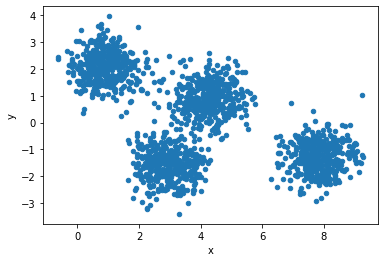

In [3]:
df_raw.plot('x','y',kind = 'scatter')

In [4]:
number_of_clusters = 4
number_of_datapoints = df_raw.shape[0]
number_of_attributes = df_raw.shape[1]

In [5]:
max_loops = 100

In [6]:
sigmas = maths.random.random(size=(number_of_clusters,number_of_attributes,number_of_attributes))
means = maths.random.random(size=(number_of_clusters,number_of_attributes,1))
probabilities = maths.random.random(size = number_of_clusters)
probabilities = probabilities/sum(probabilities)

In [7]:
print(means)
print("===")
print(sigmas)
print("===")
print(probabilities)

[[[0.977194  ]
  [0.10244373]]

 [[0.57718455]
  [0.74681943]]

 [[0.53155383]
  [0.44438232]]

 [[0.16398482]
  [0.39604749]]]
===
[[[0.16909578 0.94379047]
  [0.41645953 0.33251271]]

 [[0.11034538 0.00415175]
  [0.76484812 0.7127046 ]]

 [[0.37340626 0.6215643 ]
  [0.68668523 0.50094616]]

 [[0.12925483 0.76019916]
  [0.1571732  0.14484704]]]
===
[0.33403242 0.16111835 0.316284   0.18856524]


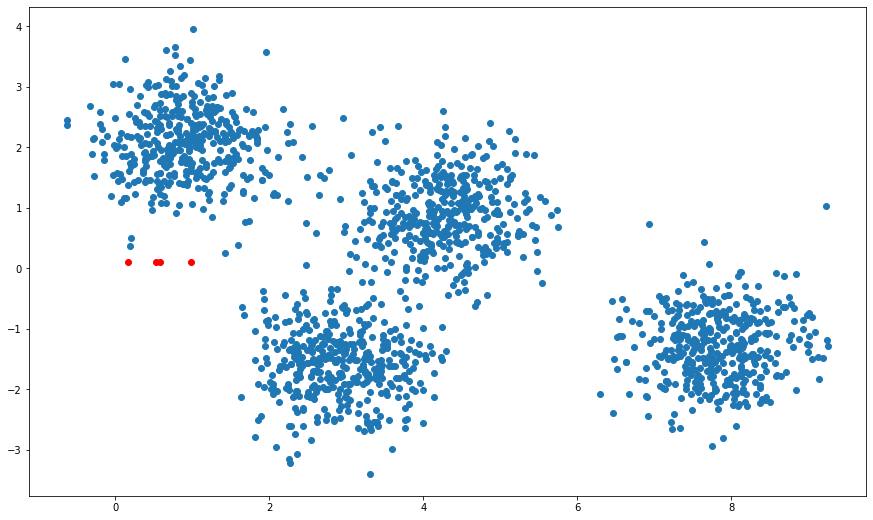

In [8]:
ratio = 6/10
width = 15
figsize = (width, width*ratio)
figure = graph.figure(figsize = figsize)
graph.scatter(df_raw['x'],df_raw['y'])
graph.scatter(means[0][0],means[0][1],c = 'red')
graph.scatter(means[1][0],means[0][1],c = 'red')
graph.scatter(means[2][0],means[0][1],c = 'red')
graph.scatter(means[3][0],means[0][1],c = 'red')

# MK 2

In [9]:
def mahalonabis_distance(x,mean,inv) :
    return float((x-mean).T @ inv @ (x-mean))

def multivariate_gaussian_distribution(x,mean,sigma_inv, sigma_det):
    n = len(x)
    exponential = exp (-0.5 * abs(mahalonabis_distance(x,mean,sigma_inv)))
    if exponential > 1: 
        raise ValueError('Exponential Limit crossed !!')
        # break
    else :
        p = ( 1 / ((2*pi)**n * abs(sigma_det))**0.5 ) * exp (-0.5 * abs(mahalonabis_distance(x,mean,sigma_inv)))
        # if p > 1 : raise ValueError('Probability Limit Exceeded than 1 !')
        # else : return p
        return p 

def normalise(p_i,number_of_datapoints,number_of_clusters):
    sum_i = []
    for i in range(number_of_datapoints):
        sum_j = []
        for j in range(number_of_clusters): sum_j.append(p_i[j][i])
        sum_i.append(sum(sum_j))
    
    for i in range(number_of_datapoints):
        for j in range(number_of_clusters):
            p_i[j][i] = p_i[j][i]/sum_i[i] 
    return p_i

[0.34755684 0.05520691 0.35789447 0.23934179]


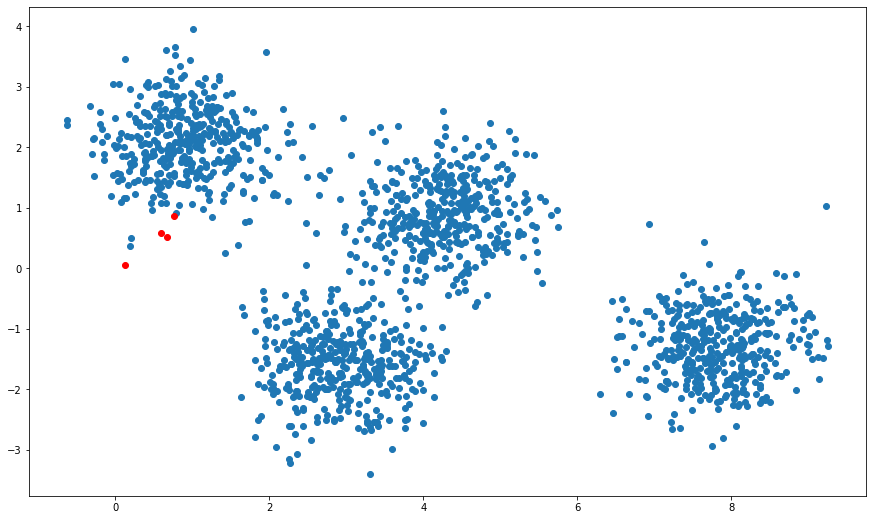

In [144]:
sigmas = maths.random.random(size=(number_of_clusters,number_of_attributes,number_of_attributes))
means = maths.random.random(size=(number_of_clusters,number_of_attributes,1))
probabilities = maths.random.random(size = number_of_clusters)
probabilities = probabilities/sum(probabilities)
print(probabilities)
ratio = 6/10
width = 15
figsize = (width, width*ratio)
figure = graph.figure(figsize = figsize)
graph.scatter(df_raw['x'],df_raw['y'])
graph.scatter(means[0][0],means[0][1],c = 'red')
graph.scatter(means[1][0],means[1][1],c = 'red')
graph.scatter(means[2][0],means[2][1],c = 'red')
graph.scatter(means[3][0],means[3][1],c = 'red')
loop = 0

In [145]:
tolerance = 2e-1
# loop = 1
# probabilities_old = probabilities - 1
while maths.linalg.norm(probabilities - (1/number_of_clusters)) > tolerance :
    p_i = []
    probabilities_old = probabilities - 1
    # tolerance = 2e-1
    # loop = 1
    
    while maths.linalg.norm(probabilities_old - probabilities) > tolerance :
    # while maths.linalg.norm(probabilities - (1/number_of_clusters)) > tolerance :
    # or maths.linalg.norm(probabilities - probabilities) > tolerance:
    # while loop < max_loops :
        print(maths.linalg.norm(probabilities - (1/number_of_clusters)))
        loop = loop + 1
        sigmas_old = sigmas.copy()
        probabilities_old = probabilities.copy()
        means_old = means.copy()
        for cluster in range(number_of_clusters):
            sigma = sigmas[cluster] 
            mean = means[cluster]
            probability = probabilities[cluster]
            p_ij = []
            det = maths.linalg.det(sigma)
            inv = maths.linalg.inv(sigma)
            for x in df_raw.itertuples(index = False, name = None):
                x = maths.matrix(x).reshape(-1,1)
                p_ij.append((probability * multivariate_gaussian_distribution(x,mean,inv,det) ))
            p_i.append(p_ij)
            
        p_i = normalise(p_i,number_of_datapoints,number_of_clusters)
        
        for cluster in range(number_of_clusters):
            p_ij = p_i[cluster]
            sum_cluster = sum(p_ij)
        
            mean = 0
            for j in range(number_of_datapoints) :
                mean = mean + p_ij[j]/sum_cluster * df_raw.iloc[j]
            means[cluster] = maths.matrix(mean).T
        
            sigma = 0 
            for j in range(number_of_datapoints) :
                x = maths.matrix(df_raw.iloc[j]).T
                sigma = sigma + (p_ij[j] / (sum_cluster - 1)) * (x - means[cluster]) @ (x - means[cluster]).T
            sigmas[cluster] = sigma
        
            probabilities[cluster] = sum_cluster/number_of_datapoints
        # if maths.linalg.norm(probabilities_old - probabilities) < tolerance : 
        #     probabilities = probabilities + 1


ratio = 6/10
width = 15
figsize = (width, width*ratio)
figure = graph.figure(figsize = figsize)
graph.title("Loop #"+str(loop))
graph.scatter(df_raw['x'],df_raw['y'])
graph.scatter(means[0][0],means[0][1],c = 'red')
graph.scatter(means[1][0],means[1][1],c = 'red')
graph.scatter(means[2][0],means[2][1],c = 'red')
graph.scatter(means[3][0],means[3][1],c = 'red')

0.24334440433035423
0.7505047766501105
0.7505047766501105
0.7240953605677286
0.6781662507189608
0.6412194465715428
0.611917937255442
0.5840157468393595
0.5531830704354974
0.517706157607849
0.4775205081262658
0.4347275991437491
0.3972517383929749
0.371240927722384
0.3560464986814766
0.3484149294155688
0.34477182551847013
0.3428308147636774
0.3415978942070098
0.34069484294569236
0.33997456859372366
0.33937355738832664
0.3388601129956458
0.3384162370112027
0.3380310022694716
0.3376976727967127
0.3374119047757973
0.33717031892745963
0.33696947347881423
0.3368053728917169
0.33667347212936816
0.3365689740151687
0.33648719497040536
0.33642385389846113
0.33637523456813695
0.33633823420865927
0.33631033489912593
0.3362895340397827
0.3362742604177556
0.33626329177492664
0.33625568169908054
0.3362506985395073
0.33624777625324004
0.3362464758075393
0.3362464553518207
0.3362474474003
0.3362492414836359
0.3362516709994343
0.3362546032534264
0.33625793190968734
0.3362615712531179
0.3362654518131213
0

KeyboardInterrupt: 

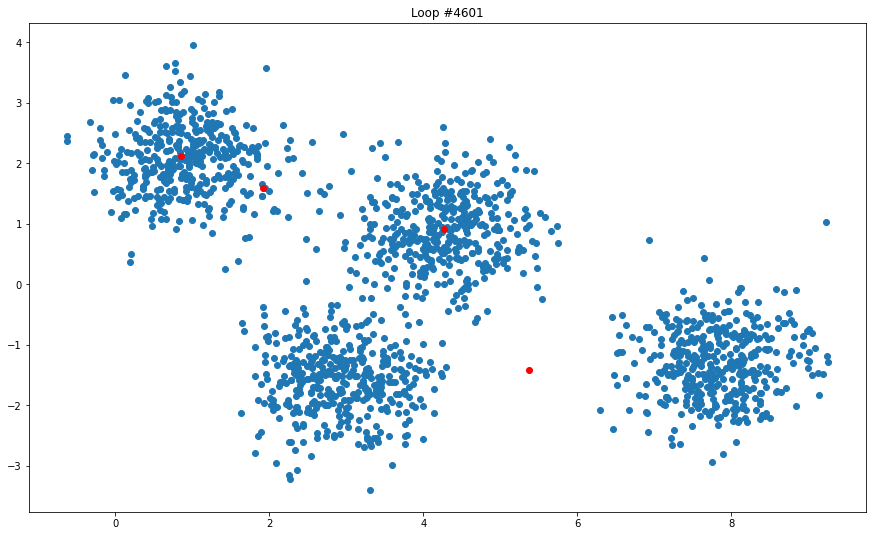

In [146]:
ratio = 6/10
width = 15
figsize = (width, width*ratio)
figure = graph.figure(figsize = figsize)
graph.title("Loop #"+str(loop))
graph.scatter(df_raw['x'],df_raw['y'])
graph.scatter(means[0][0],means[0][1],c = 'red')
graph.scatter(means[1][0],means[1][1],c = 'red')
graph.scatter(means[2][0],means[2][1],c = 'red')
graph.scatter(means[3][0],means[3][1],c = 'red')